In [93]:
# load_dotenv()

In [94]:
# alpaca_api_key = os.getenv("APCA_API_KEY")
# alpaca_secret_key = os.getenv("APCA_API_SECRET")
# # Create the Alpaca API object
# # YOUR CODE HERE!
# alpaca = tradeapi.REST(
#     alpaca_api_key,
#     alpaca_secret_key,
#     api_version= "v2")

In [95]:
# print(f"Alpaca Key type: {type(alpaca_api_key)}")
# print(f"Alpca Secret Key type: {type(alpaca_secret_key)}")

In [96]:
# current_date = pd.Timestamp("2019-10-30", tz="America/New_York").isoformat()

# tickers = ["FB", "AAPL", "AMZN", "NFLX", "GOOGL"]

# timeframe = "1D"

In [97]:
# df_ticker = alpaca.get_barset(
#     tickers,
#     timeframe,
#     start=current_date
# ).df

# df_ticker

In [98]:
# df_closing_prices = pd.DataFrame()

# for ticker in tickers:
#     df_closing_prices[ticker] = df_ticker[ticker]["close"]
# # Preview DataFrame
# # YOUR CODE HERE!
# df_closing_prices

In [99]:
# df_closing_prices.index = df_closing_prices.index.date

In [100]:
# df_closing_prices

In [101]:
# df_current_price = df_closing_prices.tail(1)

In [102]:
# df_current_price

In [103]:
# fb_current_price = (df_current_price["FB"])
# aapl_current_price = (df_current_price["AAPL"])
# amzn_current_price = (df_current_price["AMZN"])
# nflx_current_price = (df_current_price["NFLX"])
# gogl_current_price = (df_current_price["GOOGL"])

In [104]:
# print(f"Current Faceboook closing prices: ${float(fb_current_price)}")
# print(f"Current Apple closing prices: ${float(aapl_current_price)}")
# print(f"Current Amazon closing prices: ${float(amzn_current_price)}")
# print(f"Current Netflix closing prices: ${float(nflx_current_price)}")
# print(f"Current Google closing prices: ${float(gogl_current_price)}")

In [105]:
# current_changes = df_closing_prices.pct_change().dropna()

In [106]:

# FACE = float(input("ENTER WEIGHT OF Facebook"))
# APPLE = float(input("ENTER WEIGHT OF Apple"))
# AMAZON = float(input("ENTER WEIGHT OF Amazon"))
# NETFL = float(input("ENTER WEIGHT OF Netflix"))
# GOOGL= float(input("ENTER WEIGHT OF Google"))

# if FACE + APPLE + AMAZON + NETFL + GOOGL == 1:
#     portfolio_weights = [FACE, APPLE, AMAZON, NETFL, GOOGL]

#     portfolio_return = current_changes.dot(portfolio_weights)

#     portfolio_return.plot(figsize = (20, 10))

# else:
#     print("Adjust your inputs. Total weight must equal 1")

# portfolio_weights

In [119]:
import os
import pandas as pd
from mc_data_mess import MC_Df_Simulation

In [120]:
filepath = ("../data/csv_files/CLEAN_CSV_Project.csv")
portfolio_df = pd.read_csv(filepath)

In [124]:
portfolio_mc = portfolio_df.set_index("Date")

#portfolio_mc["FANG"] = portfolio_mc["FANG"].fillna(portfolio_mc["FANG"].mean()).dropna()
portfolio_mc

,FANG,GOLD,sp500,VNQ,BTC
Date,,,,,
2019-10-29,3554.71,1520.60,2938.13,80.98,9218.76
2019-10-30,3581.21,1526.50,2970.27,81.98,9433.35
2019-10-31,3576.71,1544.00,2966.15,83.41,9164.62
2019-11-01,3608.08,1541.30,2995.68,83.02,9147.98
2019-11-04,3646.23,1541.60,2989.69,83.02,9155.80
...,...,...,...,...,...
2020-10-23,5725.49,1905.20,3465.39,93.62,13128.46
2020-10-26,5671.73,1905.70,3400.97,94.28,13036.77
2020-10-27,5774.03,1911.90,3390.68,94.30,13076.37


In [130]:
# Bringing in Weights From Optimized Portfolio

fang = .06922
gld = .60655
sp500 = .17716
vnq = .08665
BTC = .06042

# running simulation

simulation = MC_Df_Simulation(
    portfolio_data = portfolio_mc,
    weights = [fang, gld, sp500, vnq, BTC],
    num_simulation = 100,
    num_trading_days = 267*5
)
simulation.portfolio_data.head()

,FANG,GOLD,sp500,VNQ,BTC
Date,,,,,
2019-10-29,3554.71,1520.6,2938.13,80.98,9218.76
2019-10-30,3581.21,1526.5,2970.27,81.98,9433.35
2019-10-31,3576.71,1544.0,2966.15,83.41,9164.62
2019-11-01,3608.08,1541.3,2995.68,83.02,9147.98
2019-11-04,3646.23,1541.6,2989.69,83.02,9155.80


In [126]:
simulation.calc_cumulative_return().head()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.026672,0.997591,0.969922,0.980419,0.996986,0.993604,1.036264,1.004833,0.993645,1.000745,1.003178,0.998548,1.011001,0.987941,1.010450,1.032751,0.954416,1.002237,1.000799,1.013824
2,1.031458,1.004145,0.988839,0.987275,0.976435,0.993569,1.038287,1.015401,0.998770,1.002816,0.991864,1.006811,0.990005,0.976125,0.989538,1.019808,0.946019,1.005408,0.959578,1.009691
3,1.018705,0.983699,0.982355,0.998295,0.991331,0.969318,1.029779,1.002261,1.009330,0.998160,0.955554,1.017499,1.020508,0.967445,1.002039,1.037647,0.921841,1.012211,0.966144,1.014036
4,1.023743,0.961919,0.981045,1.003142,0.981704,0.962859,1.026671,1.011456,1.016982,0.993141,0.971644,0.999266,0.996177,0.963205,0.999964,1.039111,0.931326,1.022648,0.983573,1.023709


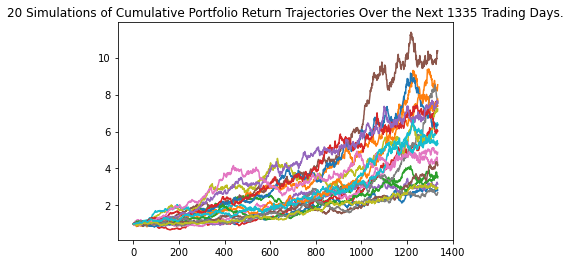

In [127]:
plot = simulation.plot_simulation()